In [90]:
import scanpy as sc
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import doubletdetection
from scipy.stats import median_abs_deviation as mad
import numpy as np
import anndata as adt

In [91]:
import warnings 
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [92]:
path = '/home/ybeaumatin/Documents/Data processing pipeline/scP/Data/data.treatment_allconditions_pg_.xlsx'

# Prep of the dataset

In [93]:
sheets = pd.read_excel(path, sheet_name=None, header = None)

In [94]:
cles = list(sheets.keys())

In [95]:
cles

['Mock3dpi_pg',
 'GFP.NEG3dpi_pg',
 'GFP.POS3dpi_pg',
 'Mock6dpi_pg',
 'GFP.NEG6dpi_pg',
 'GFP.POS6dpi_pg']

In [96]:
cles[1]

'GFP.NEG3dpi_pg'

In [97]:
sheets['GFP.POS3dpi_pg']

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,Protein.Group,Protein.Ids,Protein.Names,Genes,First.Protein.Description,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...
1,A0A0B4J2D5;P0DPI2,A0A0B4J2D5;P0DPI2,GAL3A_HUMAN;GAL3B_HUMAN,GATD3A;GATD3B,NaN,NaN,NaN,NaN,NaN,2659.9,...,7374.29,4884.76,4262.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A0AV96,A0AV96;Q8TBY0;Q9NQ94,RBM47_HUMAN,RBM47,NaN,2108.71,2618.78,4620.57,1622.4,2614.49,...,2267.7,1716.45,1502.1,NaN,1387.21,NaN,NaN,NaN,NaN,NaN
3,A0AVT1,A0AVT1,UBA6_HUMAN,UBA6,NaN,4227.87,4938.56,6304.49,4402.84,4012.5,...,3088.24,2884.52,3868.83,3665,2916.64,NaN,NaN,NaN,NaN,NaN
4,A0FGR8,A0FGR8,ESYT2_HUMAN,ESYT2,NaN,2978.79,3547.62,3554.4,2036.98,2362.04,...,3452.18,2263.99,2451.59,2170.78,2547.01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,Q9Y6N5,Q9Y6N5,SQOR_HUMAN,SQOR,NaN,11305,13771.8,12947.2,13790.9,9377.37,...,12611.6,16330.4,17443.1,9191.25,11823.8,NaN,NaN,NaN,NaN,NaN
2966,Q9Y6W3,Q9Y6W3,CAN7_HUMAN,CAPN7,NaN,1221.22,1002.14,1127.77,1123.66,1424.21,...,NaN,1433.62,1105.35,NaN,1039.57,NaN,NaN,NaN,NaN,NaN
2967,Q9Y6W5,Q9Y6W5,WASF2_HUMAN,WASF2,NaN,NaN,4525.85,NaN,4730.71,3437.31,...,16182,12436.5,9002.66,11185.3,8332.06,NaN,NaN,NaN,NaN,NaN
2968,Q9Y6X3,Q9Y6X3,SCC4_HUMAN,MAU2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
idx_var = pd.DataFrame(sheets['Mock3dpi_pg'].iloc[1:, 2]) 

In [99]:
idx_var

,2
1,CC187_HUMAN
2,TVAL3_HUMAN
3,GAL3A_HUMAN;GAL3B_HUMAN
4,PIOS1_HUMAN
5,A0A7S6HGT3_CVH22
...,...
5697,F169A_HUMAN
5698,ENPP4_HUMAN
5699,NS1BP_HUMAN
5700,S23IP_HUMAN


In [100]:
adatas = []

for x in cles:
    sheet_part = sheets[x]
    var = sheet_part.iloc[1:, 0:5]  
    obs = pd.DataFrame(sheet_part.iloc[0, 5:])  
    data = sheet_part.iloc[1:, 5:].T

    adata = sc.AnnData(X=data, obs=obs, var=var) #create anndata
    
    #remodele the indexs
    #idx_var = pd.DataFrame(sheet_part.iloc[1:, 3]) 
    adata.obs.index = obs
    
    adata.obs.index = adata.obs.index.map(str)
    adata.obs.index = adata.obs.index.str.replace(r"[()']", "", regex=True)
    adata.obs.index = adata.obs.index.str.replace(";", "")
    adata.obs.index = adata.obs.index.str.replace(",", "")


    idx_var = pd.DataFrame(sheet_part.iloc[1:, 2])  # Index pour var (colonne cible)
    adata.var.index = [str(idx[0]) if isinstance(idx, tuple) else str(idx) for idx in idx_var.iloc[:, 0]]
    adata.var.index = [idx.replace("(", "").replace(")", "").replace("'", "").replace(";", "").replace(",", "") for idx in adata.var.index]
    
    adata.var.columns = sheet_part.iloc[0, 0:5]

    
    adata.obs = adata.obs.drop(columns=[0])
    
    adatas.append(adata)

In [101]:
adatas[0].obs


""
Mock_3dpi FINI\\TU016282CK_Slot1-01_1_4668.d
Mock_3dpi FINI\\TU016284CK_Slot1-02_1_4670.d
Mock_3dpi FINI\\TU016286CK_Slot1-03_1_4672.d
Mock_3dpi FINI\\TU016288CK_Slot1-01_1_4674.d
Mock_3dpi FINI\\TU016294CK_Slot1-04_1_4680.d
...
Mock_3dpi FINI\\TU016969CK_Slot1-41_1_5355.d
Mock_3dpi FINI\\TU016970CK_Slot1-42_1_5356.d
Mock_3dpi FINI\\TU016972CK_Slot1-55_1_5358.d
Mock_3dpi FINI\\TU016973CK_Slot1-56_1_5359.d


In [102]:
adatas

[AnnData object with n_obs × n_vars = 145 × 5701
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 138 × 4142
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 133 × 2969
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 139 × 3223
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 108 × 3212
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 140 × 4385
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description']

In [103]:
def load_it(i, adata):
    adata.obs['Id'] = cles[i]
    return adata

In [104]:
adatas = [load_it(i, ad) for i, ad in enumerate(adatas)]

In [105]:
data.obs = adata.obs.applymap(str)

# Convertir toutes les colonnes de var en chaînes
adata.var = adata.var.applymap(str)

In [106]:
from scipy.sparse import csr_matrix
for ad in adatas: 
    
    if isinstance(ad.X, np.ndarray):
         ad.X = ad.X.astype(np.float32)

    if isinstance(ad.X, csr_matrix):
         ad.X = csr_matrix(ad.X, dtype=np.float32)
    # Convertir toutes les colonnes de obs et var en chaînes
    ad.obs = ad.obs.astype(str)
    ad.var = ad.var.astype(str)

    # Convertir les index d'obs et var en chaînes
    ad.obs.index = ad.obs.index.map(str)
    ad.var.index = ad.var.index.map(str)


In [107]:
adatas[0].var.Genes

CC187_HUMAN                    CCDC187
TVAL3_HUMAN                   TRAV12-3
GAL3A_HUMANGAL3B_HUMAN    GATD3;GATD3B
PIOS1_HUMAN                    PIGBOS1
A0A7S6HGT3_CVH22                     N
                              ...     
F169A_HUMAN                    FAM169A
ENPP4_HUMAN                      ENPP4
NS1BP_HUMAN                   IVNS1ABP
S23IP_HUMAN                    SEC23IP
COL10_HUMAN                    COLEC10
Name: Genes, Length: 5701, dtype: object

In [108]:
for ad in adatas:
    unique_id = ad.obs['Id'][0]
    file_path = os.path.join('/home/ybeaumatin/Documents/Data processing pipeline/scP/Data/', f'adata_{unique_id}.h5ad')
    ad.write(file_path)
    print(f"Saved: {file_path}")

Saved: /home/ybeaumatin/Documents/Data processing pipeline/scP/Data/adata_Mock3dpi_pg.h5ad
Saved: /home/ybeaumatin/Documents/Data processing pipeline/scP/Data/adata_GFP.NEG3dpi_pg.h5ad
Saved: /home/ybeaumatin/Documents/Data processing pipeline/scP/Data/adata_GFP.POS3dpi_pg.h5ad
Saved: /home/ybeaumatin/Documents/Data processing pipeline/scP/Data/adata_Mock6dpi_pg.h5ad
Saved: /home/ybeaumatin/Documents/Data processing pipeline/scP/Data/adata_GFP.NEG6dpi_pg.h5ad
Saved: /home/ybeaumatin/Documents/Data processing pipeline/scP/Data/adata_GFP.POS6dpi_pg.h5ad


# Add missing Genes names 

In [179]:
adatas = []
data_dir = '/home/ybeaumatin/Documents/Data processing pipeline/scP/Data'

for filename in os.listdir(data_dir):
    if filename.endswith('.h5ad'):
        try:
            adata = sc.read_h5ad(os.path.join(data_dir, filename))
            adata.var_names_make_unique()
            adatas.append(adata)
        except OSError as e:
            print(f"Erreur lors de la lecture du fichier {filename}: {e}")

print(f"Nombre de fichiers h5ad chargés avec succès : {len(adatas)}")

Nombre de fichiers h5ad chargés avec succès : 6


In [180]:
adatas

[AnnData object with n_obs × n_vars = 108 × 3212
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 133 × 2969
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 145 × 5701
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 139 × 3223
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 140 × 4385
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 138 × 4142
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description']

In [181]:
adatas[0].X

array([[ 5544.32,  7190.33,      nan, ...,  3585.08,  5518.76,  7944.28],
       [ 4120.03,  5809.38,      nan, ...,  2425.32,  6372.72,  8097.24],
       [ 5531.19, 11922.  ,      nan, ...,  4091.65,  5796.29,  7071.44],
       ...,
       [ 3669.94,  6447.75,      nan, ...,  3251.86,  4072.56,  8222.58],
       [ 3975.58,  4283.43,      nan, ...,  3668.98,  4208.38,  8004.19],
       [ 2984.47,  3099.07,      nan, ...,  2828.09,  4721.6 ,  7507.2 ]],
      dtype=float32)

In [182]:
adatas

[AnnData object with n_obs × n_vars = 108 × 3212
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 133 × 2969
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 145 × 5701
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 139 × 3223
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 140 × 4385
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 138 × 4142
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description']

In [183]:
for ad in adatas:
    print(ad.obs['Id'][0])
    ad.var['Genes'] = ad.var['Genes'].astype(str)
    if 'Genes' not in ad.var.columns:
        print("The column doesn't exist in adata.var")
    else:
    # Create a mask for the datas with date name
        date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%m-%d %H:%M:%S', errors='coerce').notna()
        other_date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%d-%m %H:%M:%S', errors='coerce').notna()

    # same for NaN
        nan_mask = ad.var['Genes'].astype(str).str.lower() == 'nan'

    # Combine
        incorrect_entries = date_mask | nan_mask | other_date_mask

        incorrect_genes = ad.var.loc[incorrect_entries, 'Genes']

        print("Incorrect name in column 'Genes' :")
        print(incorrect_genes)
        print(f"\nNombre total d'entrées incorrectes : {incorrect_entries.sum()}")
        print("\nIncorrect distribution :")
        print(incorrect_genes.value_counts())

    # Optionnel : afficher les indices des entrées incorrectes
        print("\nIncorrect Index :")
        print(incorrect_genes.index.tolist())

GFP.NEG6dpi_pg
Incorrect name in column 'Genes' :
SYMC_HUMAN    2001-03-01 00:00:00
Name: Genes, dtype: object

Nombre total d'entrées incorrectes : 1

Incorrect distribution :
Genes
2001-03-01 00:00:00    1
Name: count, dtype: int64

Incorrect Index :
['SYMC_HUMAN']
GFP.POS3dpi_pg
Incorrect name in column 'Genes' :
SEPT2_HUMAN    2002-09-01 00:00:00
SEPT7_HUMAN    2007-09-01 00:00:00
YI025_HUMAN                    nan
SEPT8_HUMAN    2008-09-01 00:00:00
SEP11_HUMAN    2011-09-01 00:00:00
SEP10_HUMAN    2010-09-01 00:00:00
SEPT9_HUMAN    2009-09-01 00:00:00
Name: Genes, dtype: object

Nombre total d'entrées incorrectes : 7

Incorrect distribution :
Genes
2002-09-01 00:00:00    1
2007-09-01 00:00:00    1
nan                    1
2008-09-01 00:00:00    1
2011-09-01 00:00:00    1
2010-09-01 00:00:00    1
2009-09-01 00:00:00    1
Name: count, dtype: int64

Incorrect Index :
['SEPT2_HUMAN', 'SEPT7_HUMAN', 'YI025_HUMAN', 'SEPT8_HUMAN', 'SEP11_HUMAN', 'SEP10_HUMAN', 'SEPT9_HUMAN']
Mock3dpi_pg


In [185]:
all_incorrect_indices = set()

for ad in adatas:
    print(ad.obs['Id'][0])
    ad.var['Genes'] = ad.var['Genes'].astype(str)
    if 'Genes' not in ad.var.columns:
        print("The column doesn't exist in adata.var")
    else:
        # Create a mask for the datas with date name
        date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%m-%d %H:%M:%S', errors='coerce').notna()
        other_date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%d-%m %H:%M:%S', errors='coerce').notna()

    # same for NaN
        nan_mask = ad.var['Genes'].astype(str).str.lower() == 'nan'

    # Combine
        incorrect_entries = date_mask | nan_mask | other_date_mask

        incorrect_genes = ad.var.loc[incorrect_entries, 'Genes']

        print("Incorrect name in column 'Genes' :")
        print(incorrect_genes)
        print(f"\nNombre total d'entrées incorrectes : {incorrect_entries.sum()}")
        print("\nIncorrect distribution :")
        print(incorrect_genes.value_counts())

   
        print("\nIncorrect Index :")
        print(incorrect_genes.index.tolist())
        all_incorrect_indices.update(incorrect_genes.index)


print("\nTous les indices incorrects uniques :")
print(sorted(list(all_incorrect_indices)))
print(f"\nNombre total d'indices incorrects uniques : {len(all_incorrect_indices)}")

GFP.NEG6dpi_pg
Incorrect name in column 'Genes' :
SYMC_HUMAN    2001-03-01 00:00:00
Name: Genes, dtype: object

Nombre total d'entrées incorrectes : 1

Incorrect distribution :
Genes
2001-03-01 00:00:00    1
Name: count, dtype: int64

Incorrect Index :
['SYMC_HUMAN']
GFP.POS3dpi_pg
Incorrect name in column 'Genes' :
SEPT2_HUMAN    2002-09-01 00:00:00
SEPT7_HUMAN    2007-09-01 00:00:00
YI025_HUMAN                    nan
SEPT8_HUMAN    2008-09-01 00:00:00
SEP11_HUMAN    2011-09-01 00:00:00
SEP10_HUMAN    2010-09-01 00:00:00
SEPT9_HUMAN    2009-09-01 00:00:00
Name: Genes, dtype: object

Nombre total d'entrées incorrectes : 7

Incorrect distribution :
Genes
2002-09-01 00:00:00    1
2007-09-01 00:00:00    1
nan                    1
2008-09-01 00:00:00    1
2011-09-01 00:00:00    1
2010-09-01 00:00:00    1
2009-09-01 00:00:00    1
Name: count, dtype: int64

Incorrect Index :
['SEPT2_HUMAN', 'SEPT7_HUMAN', 'YI025_HUMAN', 'SEPT8_HUMAN', 'SEP11_HUMAN', 'SEP10_HUMAN', 'SEPT9_HUMAN']
Mock3dpi_pg


In [186]:
wrong_gene_name = {
"IGA2_HUMAN":"IGA2",
"IGL1_HUMAN":"IGL1",
"SEP10_HUMAN":"SEPTIN10",
"SEP11_HUMAN":"SEPTIN11",
"SEPT2_HUMAN":"SEPTIN2",
"SEPT5_HUMAN":"SEPTIN5",
"SEPT6_HUMAN":"SEPTIN6",
"SEPT7_HUMAN":"SEPTIN7",
"SEPT8_HUMAN":"SEPTIN8",
"SEPT9_HUMAN":"SEPTIN9",
"SYMC_HUMAN":"MARS1",
"SYMM_HUMAN":"MARS2",
"YI025_HUMAN":"YI025",
"YJ005_HUMAN":"YJ005"
}

In [187]:
def corriger_noms_genes(adatas, corrections):
    for ad in adatas:

        ad.var['Genes'] = ad.var['Genes'].astype(str)
        

        ad.var['Genes'] = ad.var['Genes'].replace(corrections)
        
        date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%m-%d %H:%M:%S', errors='coerce').notna()
        
        mask_a_corriger = date_mask | (ad.var['Genes'].str.lower() == 'nan')
        ad.var.loc[mask_a_corriger, 'Genes'] = ad.var.index[mask_a_corriger].str.split('_').str[0]


corriger_noms_genes(adatas, wrong_gene_name)

In [188]:
adatas[0].var['Genes']

NUD4B_HUMANNUDT4_HUMAN    NUDT4;NUDT4B
GAL3A_HUMANGAL3B_HUMAN    GATD3;GATD3B
A0A7S6HGT3_CVH22                     N
RBM47_HUMAN                      RBM47
IFT56_HUMAN                      TTC26
                              ...     
M3K4_HUMAN                      MAP3K4
SCIN_HUMAN                        SCIN
CAN7_HUMAN                       CAPN7
WASF2_HUMAN                      WASF2
S23IP_HUMAN                    SEC23IP
Name: Genes, Length: 3212, dtype: object

In [189]:
all_incorrect_indices = set()

for ad in adatas:
    print(ad.obs['Id'][0])
    ad.var['Genes'] = ad.var['Genes'].astype(str)
    if 'Genes' not in ad.var.columns:
        print("The column doesn't exist in adata.var")
    else:
        # Create a mask for the datas with date name
        date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%m-%d %H:%M:%S', errors='coerce').notna()
        other_date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%d-%m %H:%M:%S', errors='coerce').notna()

    # same for NaN
        nan_mask = ad.var['Genes'].astype(str).str.lower() == 'nan'

    # Combine
        incorrect_entries = date_mask | nan_mask | other_date_mask

        incorrect_genes = ad.var.loc[incorrect_entries, 'Genes']

        print("Incorrect name in column 'Genes' :")
        print(incorrect_genes)
        print(f"\nNombre total d'entrées incorrectes : {incorrect_entries.sum()}")
        print("\nIncorrect distribution :")
        print(incorrect_genes.value_counts())

   
        print("\nIncorrect Index :")
        print(incorrect_genes.index.tolist())
        all_incorrect_indices.update(incorrect_genes.index)


print("\nTous les indices incorrects uniques :")
print(sorted(list(all_incorrect_indices)))
print(f"\nNombre total d'indices incorrects uniques : {len(all_incorrect_indices)}")

GFP.NEG6dpi_pg
Incorrect name in column 'Genes' :
Series([], Name: Genes, dtype: object)

Nombre total d'entrées incorrectes : 0

Incorrect distribution :
Series([], Name: count, dtype: int64)

Incorrect Index :
[]
GFP.POS3dpi_pg
Incorrect name in column 'Genes' :
Series([], Name: Genes, dtype: object)

Nombre total d'entrées incorrectes : 0

Incorrect distribution :
Series([], Name: count, dtype: int64)

Incorrect Index :
[]
Mock3dpi_pg
Incorrect name in column 'Genes' :
Series([], Name: Genes, dtype: object)

Nombre total d'entrées incorrectes : 0

Incorrect distribution :
Series([], Name: count, dtype: int64)

Incorrect Index :
[]
Mock6dpi_pg
Incorrect name in column 'Genes' :
Series([], Name: Genes, dtype: object)

Nombre total d'entrées incorrectes : 0

Incorrect distribution :
Series([], Name: count, dtype: int64)

Incorrect Index :
[]
GFP.POS6dpi_pg
Incorrect name in column 'Genes' :
Series([], Name: Genes, dtype: object)

Nombre total d'entrées incorrectes : 0

Incorrect distri

# Preprocessing similar to scRNA

In [230]:
for ad in adatas:
    ad.X = np.nan_to_num(ad.X, nan=0.0)

In [231]:
def qc(adata):
    sc.pp.filter_cells(adata, min_genes = 200)
    adata.var["mt"] = adata.var['Genes'].str.startswith("MT-")
    adata.var["ribo"] = adata.var['Genes'].str.startswith("RPS", "RPL")
    adata.var["hb"] = adata.var['Genes'].str.startswith("^HB[^(P)]")
    sc.pp.calculate_qc_metrics(adata,qc_vars=["mt","ribo","hb"], inplace = True, percent_top = [20], log1p=True)

    remove = ['total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo',
              'log1p_total_counts_ribo','total_counts_hb','log1p_total_counts_hb']

    adata.obs = adata.obs[[x for x in adata.obs.columns if x not in remove]]
    return adata

In [232]:
adatas = [qc(ad) for ad in adatas]

In [234]:
adatas[0].obs

,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb
GFP_neg_6dpi/TU017444PAP_Slot1-06_1_5848.d,GFP.NEG6dpi_pg,2623,2623,7.872455,81561328.0,18.216866,37.252361,0.039652,1.138086,0.0
GFP_neg_6dpi/TU017445PAP_Slot1-07_1_5849.d,GFP.NEG6dpi_pg,2588,2588,7.859027,76149296.0,18.148207,38.597347,0.055260,1.309538,0.0
GFP_neg_6dpi/TU017446PAP_Slot1-08_1_5850.d,GFP.NEG6dpi_pg,2666,2666,7.888710,82286816.0,18.225721,38.940031,0.033334,1.252887,0.0
GFP_neg_6dpi/TU017481PAP_Slot1-18_1_5885.d,GFP.NEG6dpi_pg,2443,2443,7.801391,94369072.0,18.362724,50.758749,0.039341,1.008372,0.0
GFP_neg_6dpi/TU017482PAP_Slot1-19_1_5886.d,GFP.NEG6dpi_pg,2791,2791,7.934513,76694224.0,18.155336,38.086211,0.047358,1.348114,0.0
...,...,...,...,...,...,...,...,...,...,...
GFP_neg_6dpi/TU017666PAP_Slot1-80_1_6060.d,GFP.NEG6dpi_pg,2977,2977,7.999007,70791848.0,18.075254,32.171278,0.064714,1.515666,0.0
GFP_neg_6dpi/TU017667PAP_Slot1-81_1_6061.d,GFP.NEG6dpi_pg,2848,2848,7.954723,73236280.0,18.109201,38.902020,0.034077,1.405893,0.0
GFP_neg_6dpi/TU017670PAP_Slot1-88_1_6064.d,GFP.NEG6dpi_pg,2815,2815,7.943073,72736544.0,18.102354,37.440140,0.039170,1.471838,0.0
GFP_neg_6dpi/TU017671PAP_Slot1-89_1_6065.d,GFP.NEG6dpi_pg,2845,2845,7.953670,68100832.0,18.036501,33.586806,0.050802,1.535169,0.0


In [222]:
#loose the var infos

In [235]:
adata = adt.concat(adatas, join="outer", index_unique="-", merge="unique")

In [237]:
adata.X = np.nan_to_num(adata.X, nan=0.0)

In [238]:
adata.X

array([[ 25140.2 ,  65314.2 ,   9879.21, ...,      0.  ,   2198.77,
             0.  ],
       [ 38213.8 ,  39348.3 ,   4703.41, ...,      0.  ,   3943.43,
          4780.26],
       [ 37409.  ,  34582.4 ,   4456.29, ...,      0.  ,   4004.28,
          5518.54],
       ...,
       [ 93301.2 , 378847.  ,  11106.3 , ...,   2113.42,  13626.9 ,
             0.  ],
       [142033.  , 511227.  ,      0.  , ...,      0.  ,      0.  ,
             0.  ],
       [137525.  , 438963.  ,  12126.2 , ...,   2894.91,  10761.4 ,
             0.  ]], dtype=float32)

In [240]:
adata.obs

,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb
GFP_neg_6dpi/TU017444PAP_Slot1-06_1_5848.d-0,GFP.NEG6dpi_pg,2623,2623,7.872455,81561328.0,18.216866,37.252361,0.039652,1.138086,0.0
GFP_neg_6dpi/TU017445PAP_Slot1-07_1_5849.d-0,GFP.NEG6dpi_pg,2588,2588,7.859027,76149296.0,18.148207,38.597347,0.055260,1.309538,0.0
GFP_neg_6dpi/TU017446PAP_Slot1-08_1_5850.d-0,GFP.NEG6dpi_pg,2666,2666,7.888710,82286816.0,18.225721,38.940031,0.033334,1.252887,0.0
GFP_neg_6dpi/TU017481PAP_Slot1-18_1_5885.d-0,GFP.NEG6dpi_pg,2443,2443,7.801391,94369072.0,18.362724,50.758749,0.039341,1.008372,0.0
GFP_neg_6dpi/TU017482PAP_Slot1-19_1_5886.d-0,GFP.NEG6dpi_pg,2791,2791,7.934513,76694224.0,18.155336,38.086211,0.047358,1.348114,0.0
...,...,...,...,...,...,...,...,...,...,...
H:\\Perdu-Alloy Pauline\\Coronavirus_HAE\\GFP_neg_3dpi\\TU017119PAP_Slot2-2_1_5515.d-5,GFP.NEG3dpi_pg,377,377,5.934894,131740112.0,18.696342,29.378539,0.000000,1.601769,0.0
H:\\Perdu-Alloy Pauline\\Coronavirus_HAE\\GFP_neg_3dpi\\TU017120PAP_Slot1-31_1_5516.d-5,GFP.NEG3dpi_pg,3844,3844,8.254529,148925136.0,18.818954,25.551442,0.046872,1.817449,0.0
H:\\Perdu-Alloy Pauline\\Coronavirus_HAE\\GFP_neg_3dpi\\TU017122PAP_Slot1-33_1_5518.d-5,GFP.NEG3dpi_pg,3909,3909,8.271293,153592864.0,18.849815,25.971670,0.123027,1.637276,0.0
H:\\Perdu-Alloy Pauline\\Coronavirus_HAE\\GFP_neg_3dpi\\TU017123PAP_Slot2-2_1_5519.d-5,GFP.NEG3dpi_pg,387,387,5.961005,144901376.0,18.791563,30.981947,0.000000,1.966709,0.0


In [241]:
file_path = os.path.join('/home/ybeaumatin/Documents/Data processing pipeline/scP/Dataset/', f'adata_concat.h5ad')
adata.write(file_path)

In [249]:
adata.X

array([[ 25140.2 ,  65314.2 ,   9879.21, ...,      0.  ,   2198.77,
             0.  ],
       [ 38213.8 ,  39348.3 ,   4703.41, ...,      0.  ,   3943.43,
          4780.26],
       [ 37409.  ,  34582.4 ,   4456.29, ...,      0.  ,   4004.28,
          5518.54],
       ...,
       [ 93301.2 , 378847.  ,  11106.3 , ...,   2113.42,  13626.9 ,
             0.  ],
       [142033.  , 511227.  ,      0.  , ...,      0.  ,      0.  ,
             0.  ],
       [137525.  , 438963.  ,  12126.2 , ...,   2894.91,  10761.4 ,
             0.  ]], dtype=float32)

In [81]:
pip install bbknn anndata scanpy


  Using cached bbknn-1.6.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached Cython-3.0.12-cp39-cp39-win_amd64.whl.metadata (3.6 kB)
  Using cached annoy-1.17.3.tar.gz (647 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using cached bbknn-1.6.0-py3-none-any.whl (14 kB)
Using cached Cython-3.0.12-cp39-cp39-win_amd64.whl (2.8 MB)
  Running setup.py clean for annoy
Failed to build annoy
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [21 lines of output]
  C:\Users\test\anaconda3\envs\annot\lib\site-packages\setuptools\installer.py:27: SetuptoolsDeprecationWarning: setuptools.installer is deprecated. Requirements should be satisfied by a PEP 517 installer.
    warnings.warn(
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\annoy
  copying annoy\__init__.py -> build\lib.win-amd64-3.9\annoy
  copying annoy\__init__.pyi -> build\lib.win-amd64-3.9\annoy
  copying annoy\py.typed -> build\lib.win-amd64-3.9\annoy
  running build_ext
  building 'annoy.annoylib' extension
  creating build\temp.win-amd64-3.9
  creating build\temp.win-amd64-3.9\Release
  creating build\temp.win-amd64-3.9\Release\src
  C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.37.32822\bin\HostX86\x64\cl.exe /c /nologo /O

In [2]:
import scanpy as sc
import seaborn as sns
import os
from matplotlib import pyplot as plt
import numpy as np

## Integration

In [55]:
adata = sc.read_h5ad('G:\Data processing pipeline 0.1 Yohan/scP/Dataset/adata_concat.h5ad')

In [56]:
adata.layers["raw_counts"] = adata.X.copy()

In [57]:
adata

AnnData object with n_obs × n_vars = 780 × 6570
    obs: 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'
    layers: 'raw_counts'

In [58]:
adata.var

""
1433B_HUMAN
1433E_HUMAN
1433F_HUMAN
1433G_HUMAN
1433S_HUMAN
...
ZRAB2_HUMAN
ZSWM8_HUMAN
ZW10_HUMAN
ZYX_HUMAN


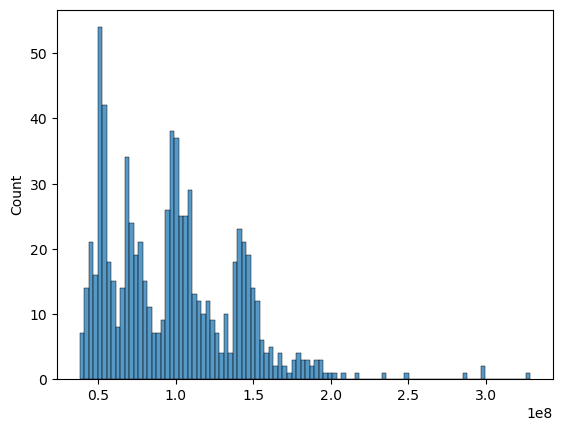

In [59]:
p1 = sns.histplot(adata.layers["raw_counts"].sum(1), bins=100, kde=False)

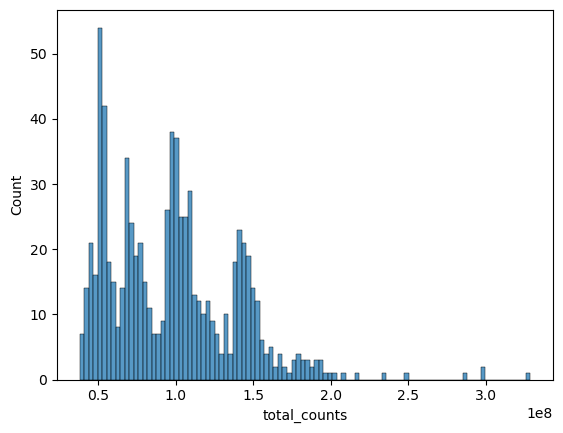

In [60]:
p1 = sns.histplot(adata.obs['total_counts'], bins=100, kde=False)

## Unindented data (raw data)

In [61]:
adata.obs['Id'].value_counts()

Id
Mock3dpi_pg       144
GFP.POS6dpi_pg    139
Mock6dpi_pg       139
GFP.NEG3dpi_pg    138
GFP.POS3dpi_pg    112
GFP.NEG6dpi_pg    108
Name: count, dtype: int64

In [62]:
sc.pp.highly_variable_genes(adata,flavor='seurat_v3')
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
adata

C:\Users\test\anaconda3\envs\annot\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


AnnData object with n_obs × n_vars = 780 × 6570
    obs: 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'distances', 'connectivities'

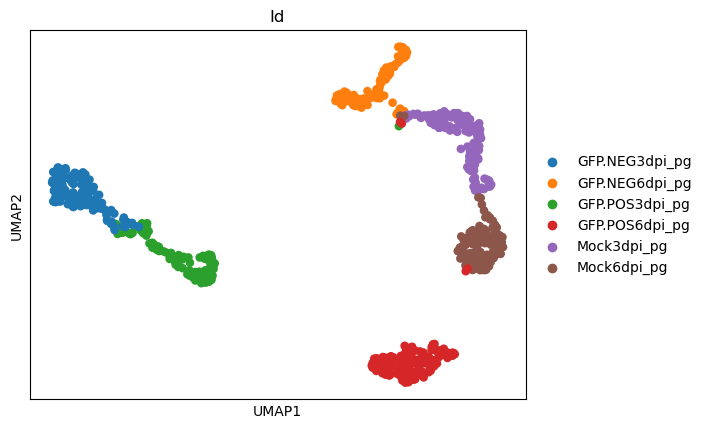

In [63]:
sc.pl.umap(
    adata,
    color=['Id']
)

## Normalized data but unindented

In [64]:
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

In [65]:
adata

AnnData object with n_obs × n_vars = 780 × 6570
    obs: 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'Id_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts', 'log1p_norm'
    obsp: 'distances', 'connectivities'

In [66]:
adata.X = adata.layers["log1p_norm"]

In [67]:
sc.pp.highly_variable_genes(adata,flavor='cell_ranger')
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution = 3, key_added = 'overcluster')
sc.tl.umap(adata)

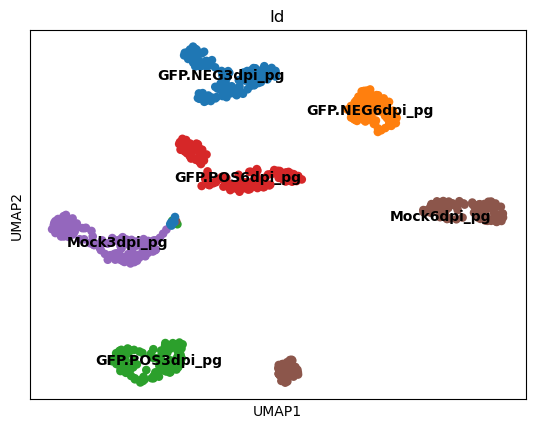

In [68]:
sc.pl.umap(
    adata,
    color=['Id'],
    legend_loc="on data",
)

## Batch aware selection feature

In [69]:
sc.pp.highly_variable_genes(
    adata, n_top_genes=2000, flavor="cell_ranger", batch_key='Id'
)
adata.var

,highly_variable,highly_variable_rank,means,variances,variances_norm,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
1433B_HUMAN,False,NaN,10.932453,6.458378e+09,0.903673,0.049416,-2.376553,2,False
1433E_HUMAN,False,1022.0,11.527600,7.413234e+10,1.814721,0.055105,5.103041,2,False
1433F_HUMAN,True,NaN,8.514702,1.932819e+07,0.438520,0.407140,-0.209810,3,False
1433G_HUMAN,True,NaN,10.385756,2.257132e+09,0.755316,0.212262,5.566907,4,False
1433S_HUMAN,True,NaN,9.881219,2.952524e+09,1.106660,0.450643,2.856829,5,False
...,...,...,...,...,...,...,...,...,...
ZRAB2_HUMAN,True,NaN,6.356290,1.545524e+07,0.649670,2.406121,1.349175,6,True
ZSWM8_HUMAN,False,1230.0,1.010128,5.961342e+06,1.614638,0.389144,0.380347,1,False
ZW10_HUMAN,False,NaN,1.848561,1.162578e+06,0.487048,1.817743,-0.487652,0,False
ZYX_HUMAN,True,NaN,8.134339,2.242487e+07,0.598601,0.631217,0.067457,3,False


In [70]:
adata.var["highly_variable_nbatches"]

1433B_HUMAN    2
1433E_HUMAN    2
1433F_HUMAN    3
1433G_HUMAN    4
1433S_HUMAN    5
              ..
ZRAB2_HUMAN    6
ZSWM8_HUMAN    1
ZW10_HUMAN     0
ZYX_HUMAN      3
ZZEF1_HUMAN    2
Name: highly_variable_nbatches, Length: 6570, dtype: int32

highly_variable_nbatches
1    1868
0    1565
2    1136
3     838
4     648
5     336
6     179
Name: count, dtype: int64

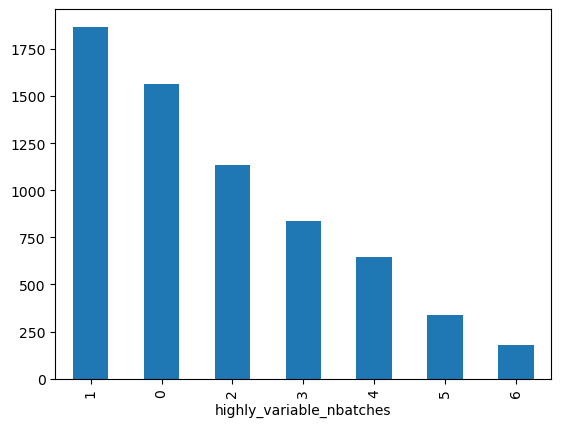

In [71]:
n_batches = adata.var["highly_variable_nbatches"].value_counts()
ax = n_batches.plot(kind="bar")
n_batches

In [72]:
adata_hvg = adata[:, adata.var["highly_variable"]].copy()
adata_hvg

AnnData object with n_obs × n_vars = 780 × 2000
    obs: 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'overcluster'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'Id_colors', 'overcluster'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts', 'log1p_norm'
    obsp: 'distances', 'connectivities'

In [73]:
neighbors_within_batch = 25 if adata_hvg.n_obs > 100000 else 3
neighbors_within_batch

3

In [75]:
adata_bbknn = adata_hvg.copy()
adata_bbknn.X = adata_bbknn.layers["log1p_norm"].copy()
sc.pp.pca(adata_bbknn)

In [76]:
bbknn.bbknn(
    adata_bbknn, batch_key=batch_key, neighbors_within_batch=neighbors_within_batch
)
adata_bbknn

NameError: name 'bbknn' is not defined